# Law of large numbers

The law of large numbers states that as the number of trials increases, the actual ratio of outcomes will converge on the theoretical, or expected, ratio of outcomes.



# Central limit theorem

The central limit theorem states that the sampling distribution of the mean of any independent, random variable will be normal or nearly normal, if the sample size is large enough.

The central limit theorem is important because it allows us to make inferences about a population from a sample. The central limit theorem applies to the mean, or average, of any distribution. It says the mean of a large sample will be approximately normally distributed.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# example with a rolling die

# die probabilities, weighted
# unfair die
f1 = 2/8
f2 = 2/8
f3 = 1/8
f4 = 1/8
f5 = 1/8
f6 = 1/8

# confirm sum to 1
print(f1+f2+f3+f4+f5+f6)

# expected value
expval = 1*f1 + 2*f2 + 3*f3 + 4*f4 + 5*f5 + 6*f6
print(expval)

# population
population = [1,1,2,2,3,4,5,6]
for i in range(20):
    population = np.hstack((population, population))

nPop = len(population)
sample = np.random.choice(population, size=8)
print(np.mean(sample))

1.0
3.0
2.875


3.00045198830545
3.186199294532628


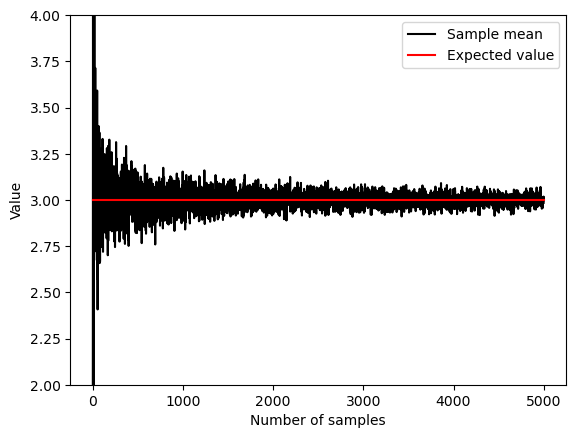

In [7]:
# experiment: draw larger and larger samples
k = 5000
sampleAve = np.zeros(k)

for i in range(k):
    idx = np.floor(np.random.rand(i+1)*nPop).astype(int)
    sampleAve[i] = np.mean(population[idx])

# plot histogram
plt.plot(sampleAve, 'k')
plt.plot([1,k], [expval, expval], 'r')
plt.xlabel('Number of samples')
plt.ylabel('Value')
plt.ylim([expval-1,expval+1])
plt.legend(['Sample mean', 'Expected value'])

print(np.mean(sampleAve))
print(np.mean(sampleAve[:9])) # first 10 samples

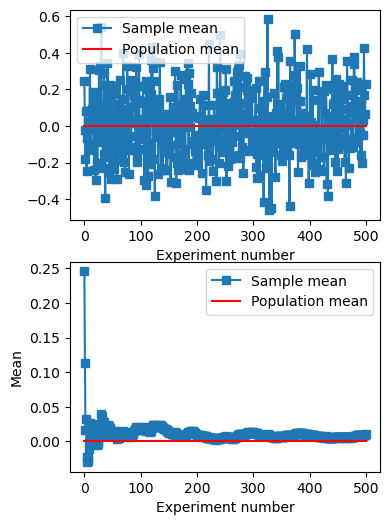

In [9]:
# another example

# population

populationN = 100000
population = np.random.randn(populationN)
population = population - np.mean(population) # demean

sampleSize = 30
numberOfExps = 500
samplemeans = np.zeros(numberOfExps)

for i in range(numberOfExps):
    sampleidx = np.random.randint(0, populationN, sampleSize)
    samplemeans[i] = np.mean(population[sampleidx])

fig, ax = plt.subplots(2, 1, figsize=(4, 6))
ax[0].plot(samplemeans, 's-')
ax[0].plot([0, numberOfExps], [np.mean(population), np.mean(population)], 'r')
ax[0].set_xlabel('Experiment number')
ax[0].legend(['Sample mean', 'Population mean'])

ax[1].plot(np.cumsum(samplemeans) / np.arange(1, numberOfExps + 1), 's-')
ax[1].plot([0, numberOfExps], [np.mean(population), np.mean(population)], 'r')
ax[1].set_xlabel('Experiment number')
ax[1].set_ylabel('Mean')
ax[1].legend(['Sample mean', 'Population mean'])

plt.show()

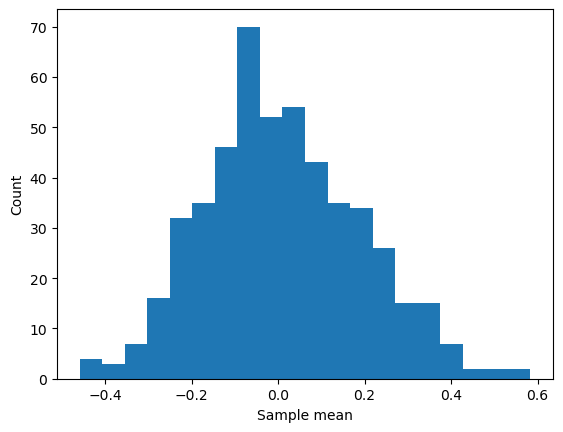

In [11]:
plt.hist(samplemeans, 20)
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.show()

# Central limit theorem in action

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


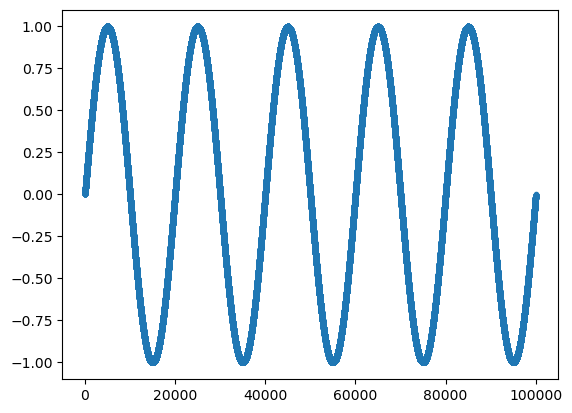

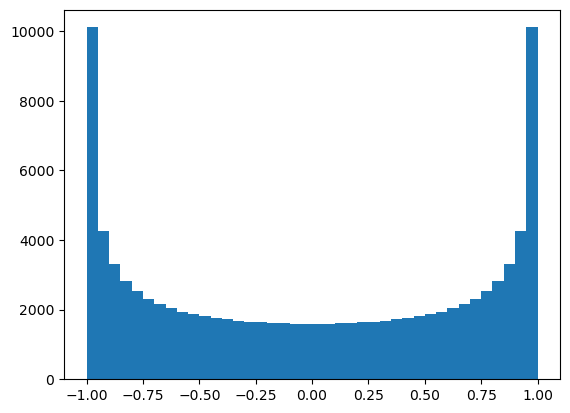

In [11]:
## create data from power law distribution

N = 100000
data = np.random.randn(N)**2
# alternative data
data = np.sin(np.linspace(0, 10*np.pi, N))

plt.plot(data, '.')
plt.show()

plt.hist(data, 40)
plt.show()

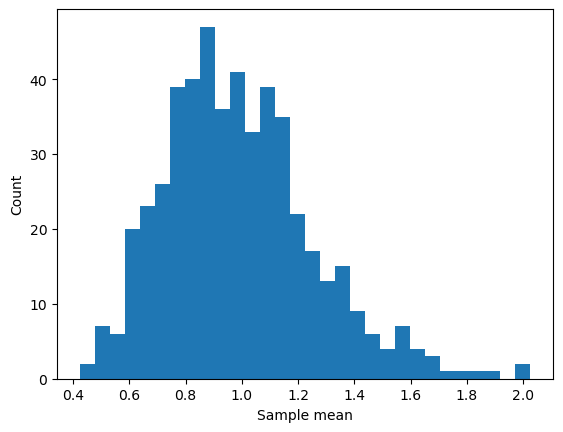

In [5]:
# repeated samples of the mean
samplesize = 30
numberofexps = 500
samplemeans = np.zeros(numberofexps)

for i in range(numberofexps):
    sampleidx = np.random.randint(0, N, samplesize)
    samplemeans[i] = np.mean(data[sampleidx])

plt.hist(samplemeans, 30)
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Distribution of combined signal')

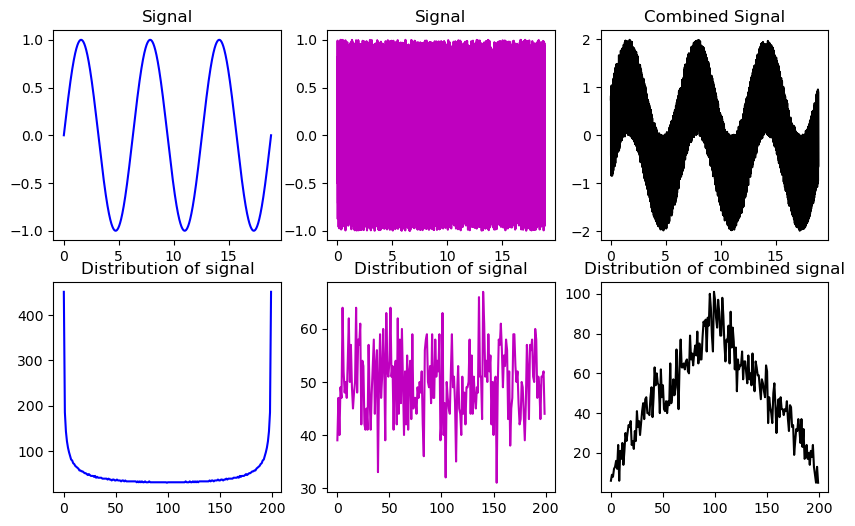

In [10]:
# Linear mixtures

x = np.linspace(0, 6*np.pi, 10001)
s = np.sin(x)
u = 2*np.random.rand(len(x))-1

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
ax[0, 0].plot(x, s, 'b')
ax[0, 0].set_title('Signal')

y, xx = np.histogram(s, 200)
ax[1,0].plot(y, 'b')
ax[1,0].set_title('Distribution of signal')

ax[0, 1].plot(x, u, 'm')
ax[0, 1].set_title('Signal')

y, xx = np.histogram(u, 200)
ax[1,1].plot(y, 'm')
ax[1,1].set_title('Distribution of signal')

ax[0, 2].plot(x, s+u, 'k')
ax[0, 2].set_title('Combined Signal')

y, xx = np.histogram(s+u, 200)
ax[1,2].plot(y, 'k')
ax[1,2].set_title('Distribution of combined signal')